# Sentiment Analysis 

In [36]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


### Restart kernel and run all cells

In [37]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [38]:
import pandas as pd
df = pd.read_csv('a1_IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [40]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [41]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

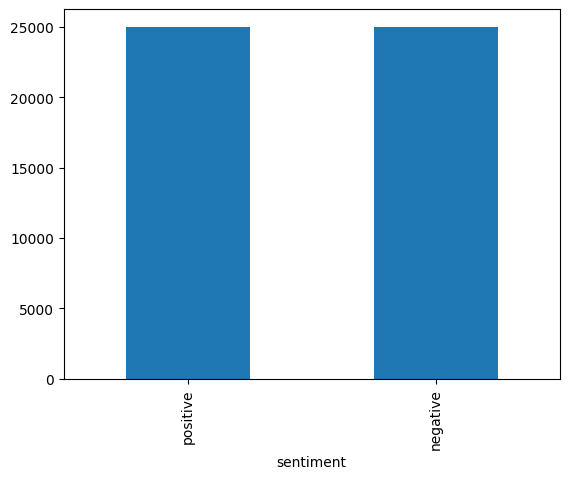

In [42]:
df['sentiment'].value_counts().plot(kind='bar')

### Text Preprocessing

### Step 1: Remove HTML Tags

In [43]:
print(df['review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [44]:
import re
tag_re = re.compile(r'<[^>]+>')

def remove_tags(text):
    return tag_re.sub('',text)

In [45]:
remove_tags(df['review'][0])

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

### Download stopwords

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Utkarsh
[nltk_data]     Gaikwad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords

In [48]:
'ETLHive'.lower()

'etlhive'

In [49]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
def preprocess_text(sen):

    # Step 1: Convert sentence to lower case:
    sentence = sen.lower()

    # Step 2: Remove Html tags
    sentence = remove_tags(sentence)    

    # Step 3: Remove all puntuations and symbols
    sentence = re.sub('[^a-z ]', ' ', sentence)

    # Step 4: Remove single charactersa after removal of punctuations
    sentence = re.sub(r"\s+[a-z]\s+", ' ', sentence)

    # Step 5: Remove extra space
    sentence = re.sub(r'\s+',' ',sentence)

    # Step 6: Remove stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence   

### Get preprocessed text in X 

In [51]:
X = []
for i in df['review']:
    X.append(preprocess_text(i))

In [52]:
X[0]

'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skill

### Preprocessing of sentiments (Y)

In [53]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [54]:
Y = df['sentiment'].replace({'positive':1, 'negative':0}).values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Perform train test split

In [55]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=42)

In [56]:
xtrain[0]

'kept asking many fights screaming matches swearing general mayhem permeate minutes comparisons also stand think one dimensional characters little depth virtually impossible care happens badly written cyphers director hang multicultural beliefs topic done much better dramas tv cinema must confess really one spotting bad performances film must said nichola burley heroine slutty best friend wasim zakir nasty bullying brother absolutely terrible know acting school graduated apply full refund post haste samina awan lead role manages impress cast called british talent probably never hear least hope next time hire different scout another intriguing thought hideously fashionable soundtrack featuring likes snow patrol ian brown keane bit music fan familiar artists output recognise tracks movie apart omnipresent run sides anyone get many many musical montages telegraph suppose feel accompanied startlingly original images couples kissing swollen lake canoodling doorways problem none songs convey

In [57]:
len(xtrain)

40000

In [58]:
len(xtest)

10000

### Create Embedding matrix

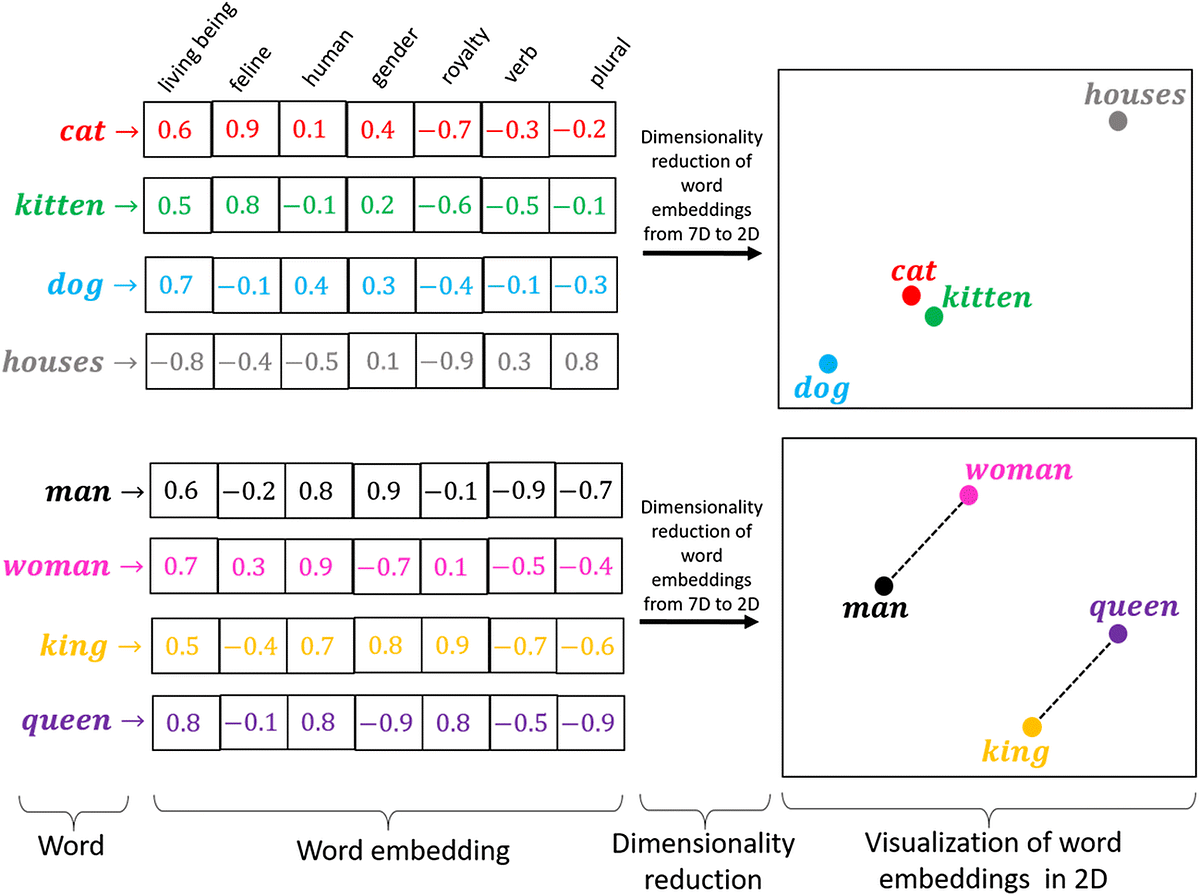

In [59]:
from keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(xtrain)

xtrain = word_tokenizer.texts_to_sequences(xtrain)
xtest = word_tokenizer.texts_to_sequences(xtest)

In [60]:
xtrain[0]

[656,
 1983,
 32,
 1723,
 1851,
 4139,
 6264,
 652,
 4644,
 21627,
 120,
 5949,
 18,
 635,
 25,
 3,
 1830,
 26,
 41,
 968,
 2185,
 1030,
 330,
 417,
 762,
 281,
 28005,
 59,
 2795,
 35554,
 4176,
 2757,
 114,
 13,
 44,
 2960,
 126,
 309,
 96,
 4746,
 10,
 3,
 14235,
 14,
 244,
 2,
 96,
 190,
 56765,
 39669,
 1683,
 9850,
 38,
 295,
 45768,
 45769,
 1515,
 11001,
 439,
 301,
 259,
 39,
 37,
 247,
 11608,
 6601,
 243,
 12033,
 1012,
 23694,
 56766,
 56767,
 339,
 110,
 860,
 3982,
 75,
 315,
 555,
 483,
 127,
 34,
 700,
 113,
 305,
 246,
 6,
 3555,
 164,
 10000,
 62,
 1536,
 87,
 11392,
 11197,
 585,
 1767,
 1044,
 2698,
 11198,
 3531,
 1516,
 32471,
 121,
 100,
 207,
 919,
 2651,
 8472,
 8963,
 3832,
 1,
 843,
 16494,
 364,
 2429,
 136,
 15,
 32,
 32,
 553,
 9712,
 12506,
 1197,
 119,
 4177,
 17434,
 102,
 990,
 4199,
 5069,
 24901,
 2138,
 45770,
 29970,
 320,
 486,
 577,
 2775,
 1114,
 16071,
 3430,
 59,
 1343,
 1083,
 1449,
 732,
 1091,
 185,
 2714,
 288,
 489,
 154,
 3373,
 845,
 13

In [61]:
word_tokenizer.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'bad': 14,
 'get': 15,
 'people': 16,
 'great': 17,
 'also': 18,
 'first': 19,
 'made': 20,
 'make': 21,
 'could': 22,
 'way': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'watch': 27,
 'character': 28,
 'films': 29,
 'seen': 30,
 'two': 31,
 'many': 32,
 'plot': 33,
 'never': 34,
 'love': 35,
 'life': 36,
 'acting': 37,
 'best': 38,
 'know': 39,
 'show': 40,
 'little': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'scene': 46,
 'still': 47,
 'say': 48,
 'scenes': 49,
 'something': 50,
 'go': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'thing': 55,
 'actors': 56,
 'though': 57,
 'years': 58,
 'director': 59,
 'funny': 60,
 'old': 61,
 'another': 62,
 'actually': 63,
 'work': 64,
 'makes': 65,
 'nothing': 66,
 'look': 67,
 'going': 68,
 'find': 69,
 'lot': 70,
 'new': 71,
 'every': 72,
 'part': 73,
 'wo

# Get vocal length

In [62]:
vocab_len = len(word_tokenizer.word_index) + 1

In [63]:
vocab_len

92394

### Perform padding on your sequences

In [65]:
from keras.utils import pad_sequences
maxlen = 100
xtrain = pad_sequences(xtrain, maxlen=maxlen, padding='post')
xtest = pad_sequences(xtest, maxlen=maxlen, padding='post')

In [66]:
xtrain[0]

array([32471,   121,   100,   207,   919,  2651,  8472,  8963,  3832,
           1,   843, 16494,   364,  2429,   136,    15,    32,    32,
         553,  9712, 12506,  1197,   119,  4177, 17434,   102,   990,
        4199,  5069, 24901,  2138, 45770, 29970,   320,   486,   577,
        2775,  1114, 16071,  3430,    59,  1343,  1083,  1449,   732,
        1091,   185,  2714,   288,   489,   154,  3373,   845, 13300,
        1103,   111, 17435,   113,     3,    89,  1296,   935,  4726,
       20778, 28006,   117,   238,     3,  3406,    92,  8003,   729,
        3289,  1584,    63,    93,    76,    33,   340,   114,   208,
        3290,  1707,  4526,  1231,     2,  3334,  1852,  2242,   339,
         396,  2386, 17436,  2559,  1608,   449,  3609,    96,   232,
        3671])

### Import the embeddings from GLOVE model

In [67]:
from numpy import asarray, zeros

In [69]:
zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [70]:
embedding_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding='utf8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimension = asarray(records[1:],dtype='float32')
    embedding_dictionary[word] = vector_dimension
glove_file.close()

In [73]:
embedding_dictionary['movie']

array([ 0.38251  ,  0.14821  ,  0.60601  , -0.51533  ,  0.43992  ,
        0.061053 , -0.62716  , -0.025385 ,  0.1643   , -0.22101  ,
        0.14423  , -0.37213  , -0.21683  , -0.08895  ,  0.097904 ,
        0.6561   ,  0.64455  ,  0.47698  ,  0.83849  ,  1.6486   ,
        0.88922  , -0.1181   , -0.012465 , -0.52082  ,  0.77854  ,
        0.48723  , -0.014991 , -0.14127  , -0.34747  , -0.29595  ,
        0.1028   ,  0.57191  , -0.045594 ,  0.026443 ,  0.53816  ,
        0.32257  ,  0.40788  , -0.043599 , -0.146    , -0.48346  ,
        0.32036  ,  0.55086  , -0.76259  ,  0.43269  ,  0.61753  ,
       -0.36503  , -0.60599  , -0.79615  ,  0.3929   , -0.23668  ,
       -0.34719  , -0.61201  ,  0.54747  ,  0.94812  ,  0.20941  ,
       -2.7771   , -0.6022   ,  0.8495   ,  1.2549   ,  0.017893 ,
       -0.041901 ,  2.1147   , -0.026618 , -0.28104  ,  0.68124  ,
       -0.14165  ,  0.99249  ,  0.49879  , -0.67538  ,  0.6417   ,
        0.42303  , -0.27913  ,  0.063403 ,  0.68909  , -0.3618

In [74]:
len(embedding_dictionary['movie'])

100

### Embedding matrix creation

In [75]:
embedding_matrix = zeros((vocab_len,100))

In [76]:
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embedding_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index]=embedding_vector

In [78]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38251001,  0.14821   ,  0.60601002, ...,  0.058921  ,
         0.091112  ,  0.47283   ],
       [ 0.19915999, -0.049702  ,  0.24579   , ..., -0.068109  ,
         0.017651  ,  0.06455   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37771001,  0.22946   , -0.30311   , ..., -0.33610001,
         0.02637   , -0.72302002],
       [ 0.99882001,  0.044     ,  0.58508003, ..., -0.54869002,
         0.15141   ,  1.36880004]])

In [79]:
embedding_matrix.shape

(92394, 100)

### Training the neural network

In [80]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [81]:
lstm_model = Sequential()

embedding_layer = Embedding(vocab_len, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)

# Layer1 Embedding
lstm_model.add(embedding_layer)

# Layer2 LSTM 
lstm_model.add(LSTM(128))

# Layer3 Dense Layers
lstm_model.add(Dense(1, activation='sigmoid'))

In [82]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9239400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 9356777 (35.69 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________


### Compile the model

In [83]:
lstm_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
hist = lstm_model.fit(xtrain, ytrain, validation_split=0.2, epochs=5, batch_size=128)

Epoch 1/5
250/250 [==============================] - 41s 152ms/step - loss: 0.5155 - accuracy: 0.7472 - val_loss: 0.4268 - val_accuracy: 0.8031
Epoch 2/5
250/250 [==============================] - 37s 148ms/step - loss: 0.4196 - accuracy: 0.8158 - val_loss: 0.3950 - val_accuracy: 0.8259
Epoch 3/5
250/250 [==============================] - 38s 152ms/step - loss: 0.3643 - accuracy: 0.8417 - val_loss: 0.3487 - val_accuracy: 0.8528
Epoch 4/5
250/250 [==============================] - 37s 150ms/step - loss: 0.3366 - accuracy: 0.8582 - val_loss: 0.3360 - val_accuracy: 0.8560
Epoch 5/5
250/250 [==============================] - 37s 150ms/step - loss: 0.3196 - accuracy: 0.8649 - val_loss: 0.3358 - val_accuracy: 0.8629


### Plot the learning curve

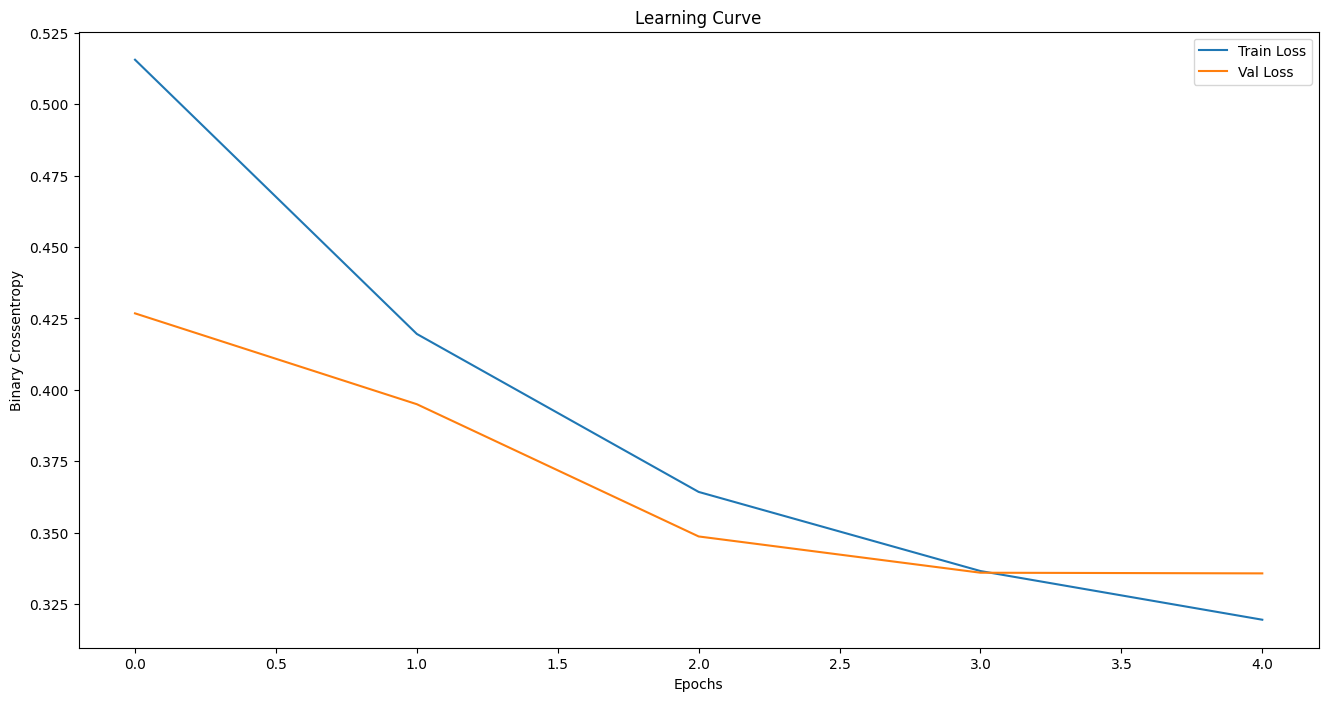

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate model

In [88]:
lstm_model.evaluate(xtrain, ytrain)

1250/1250 [==============================] - 35s 28ms/step - loss: 0.3060 - accuracy: 0.8754


[0.3059839606285095, 0.8754000067710876]

In [89]:
lstm_model.evaluate(xtest, ytest)

313/313 [==============================] - 7s 23ms/step - loss: 0.3403 - accuracy: 0.8617


[0.34026405215263367, 0.8616999983787537]

### Predict train and test data

In [90]:
yprob_tr = lstm_model.predict(xtrain)
yprob_ts = lstm_model.predict(xtest)

313/313 [==============================] - 9s 27ms/step


In [91]:
ypred_ts = []
for i in yprob_ts:
    if i>=0.5:
        ypred_ts.append(1)
    else:
        ypred_ts.append(0)

In [92]:
ypred_ts[0:5]

[0, 1, 0, 1, 0]

In [94]:
ytest[0:5]

array([1, 1, 0, 1, 0], dtype=int64)

### Confusion Matrix

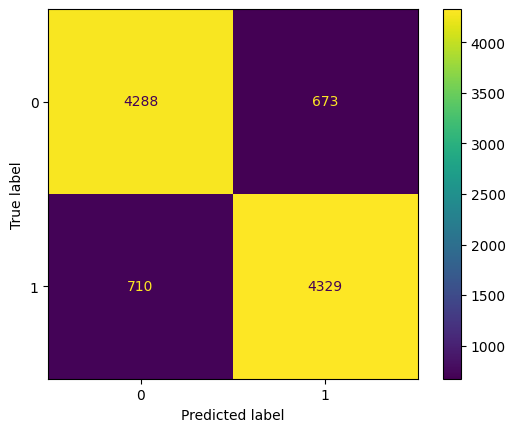

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Classification Report

In [96]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4961
           1       0.87      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### Predicting on unseen data

In [97]:
sample_review = pd.read_csv('a3_IMDb_Unseen_Reviews.csv')
sample_review

,Unnamed: 0,Movie,Review Text,IMDb Rating
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3
3,3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1
4,4,Eternals,Amazing visuals and philosophical concepts!\n\...,10
5,5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3


In [98]:
# Unseen reviews
unseen_reviews = sample_review['Review Text']
unseen_reviews

0    Intelligent Movie.\nThis movie is obviously al...
1    Extraordinary and thought-provoking.\n'Ex mach...
2    Poor story, only reasonable otherwise.\nIf I h...
3    Had Great Potential.\nThis movie is one of the...
4    Amazing visuals and philosophical concepts!\n\...
5    Worst MCU film ever\n\nFollowing the events of...
Name: Review Text, dtype: object

In [99]:
# Preprocessing
unseen_pre = []

for i in unseen_reviews:
    unseen_pre.append(preprocess_text(i))

In [100]:
unseen_pre

['intelligent movie movie obviously allegorical fascinating tale ai mainly manipulation power wanting action spectacular cgi movie aimed people like think rather passively wait entertained themes ai also surveillance excellent points data us collected phone companies search engine companies commercial operating systems makers plot seems simple extremely clever protagonist playing games trying stay one step ahead one another movie perfectly consistent internal logic plays perfectly go expecting much however see people satisfied movie sets brilliantly therefore give least recent movies getting movie succeeds another recent movie ai transcendence think called failed interesting failure third movie ai spanish movie called eva also brilliant eva moving movie philosophical movies perfect different ways ai name movie ava seems nod title spanish movie aside nice stars appeared ex machina eva casting great course several aspects movie unrealistic often absurd allegorical movie acceptable movie 

In [102]:
## Unseen tokenize
unseen_tokenized = word_tokenizer.texts_to_sequences(unseen_pre)

In [103]:
## Unseen padded
unseen_padded = pad_sequences(unseen_tokenized, maxlen=maxlen, padding='post')

In [105]:
unseen_padded[-1]

array([  133,     2,    42,   794,   565, 15155, 28863,  1915,  1448,
        1711,  2066,  1759,   447,   561,   840,  2801,    58,  3047,
        8281,  4115,  2066,  1949, 32617,     2,   116,   133,     2,
          27,  2371,  3603,   523, 23450,   350,  4973, 17597,    14,
           9,   838,    65,   301,   169,  5183,    26,    41,    97,
       13936,  1159,  2772,    14,     2,   219,  2230, 28863,  6241,
         100,  1370,    12,  4185,   659,  4089,   466, 12639,     5,
           1,    65,  1431,  5475,  3833,    43,    67,     5,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])

In [106]:
### Predict the sentiments
sentiments = lstm_model.predict(unseen_padded)

1/1 [==============================] - 0s 26ms/step


In [107]:
sentiments

array([[0.87359965],
       [0.992022  ],
       [0.18071699],
       [0.90029234],
       [0.94139814],
       [0.01048254]], dtype=float32)

In [108]:
imdb_reviews = sentiments*10

In [109]:
imdb_reviews

array([[8.735996  ],
       [9.920219  ],
       [1.8071699 ],
       [9.002923  ],
       [9.413981  ],
       [0.10482541]], dtype=float32)

In [110]:
final_sentiment = []
for i in sentiments:
    if i>=0.5:
        final_sentiment.append('Positive')
    else:
        final_sentiment.append('Negative')

In [111]:
final_sentiment

['Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative']

In [112]:
sample_review['LSTM Sentiments']=imdb_reviews

In [113]:
sample_review['Final Sentiments']=final_sentiment

In [114]:
sample_review

,Unnamed: 0,Movie,Review Text,IMDb Rating,LSTM Sentiments,Final Sentiments
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9,8.735996,Positive
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10,9.920219,Positive
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3,1.807170,Negative
3,3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1,9.002923,Positive
4,4,Eternals,Amazing visuals and philosophical concepts!\n\...,10,9.413981,Positive
5,5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3,0.104825,Negative


### Save this model for fututure use

In [115]:
lstm_model.save('Sentiment_Model.keras')